In [33]:
from sklearn.datasets import fetch_olivetti_faces

In [34]:
olivetti_faces = fetch_olivetti_faces(data_home='./face_data', shuffle=True)
print(olivetti_faces.data.shape)
print(olivetti_faces.target.shape)
print(olivetti_faces.images.shape)

(400, 4096)
(400,)
(400, 64, 64)


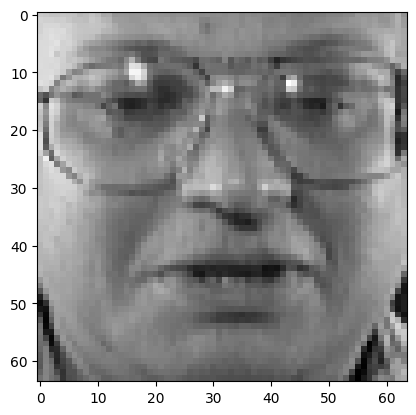

In [35]:
import matplotlib.pyplot as plt

face = olivetti_faces.images[1]
plt.imshow(face, cmap='gray')
plt.show()

In [36]:
olivetti_faces.data[1]

array([0.76859504, 0.75619835, 0.74380165, ..., 0.48347107, 0.6280992 ,
       0.6528926 ], dtype=float32)

In [37]:
olivetti_faces.target

array([13, 30, 34, 19, 24,  6, 15, 26, 14, 21,  3, 13, 11, 34,  1,  5, 29,
       14, 20, 19, 17, 26, 12, 34, 17, 31,  7,  1, 28, 10, 17, 30, 33, 22,
        6,  7,  9, 17, 17, 39, 10, 32,  0,  0, 29,  5, 37, 25, 15, 23, 24,
       14, 29, 17, 28, 31,  5,  1,  2,  4,  7, 27,  0, 35, 19, 37, 14,  0,
       15, 31,  0, 26,  6,  2, 10,  1, 36, 30, 36, 32, 33,  6,  5, 10, 30,
       22, 12, 37, 39, 32, 38, 25,  5,  0, 19, 14, 13, 39, 26, 36, 25,  6,
       31, 15, 28, 34,  8, 34, 15, 29,  9,  8, 29,  2, 36, 21, 25,  4, 23,
       34,  9, 22, 23, 23, 37, 14,  2, 25, 35, 16, 15, 39,  6, 24, 21, 10,
       31, 19, 32,  1, 16, 18,  3, 11, 26, 10, 35, 24, 23, 11, 33, 12, 28,
       11, 21, 13, 27, 12, 19, 29, 28, 13,  3, 37, 16,  3, 23,  9,  8,  6,
       16, 28, 20, 39, 23, 28, 10,  4, 32, 39, 22,  7, 13, 38, 22, 21,  2,
       18, 36, 27,  5, 32, 35,  2,  0, 21, 15, 21, 37, 22, 13, 23, 21, 27,
       27, 30, 23,  3, 20, 39,  6,  2, 33,  4, 24, 12,  9, 11, 16, 38, 38,
       34,  4,  1, 28,  7

In [38]:
import torch
import torch.nn as nn

In [39]:
images = torch.tensor(olivetti_faces.data)
targets = torch.tensor(olivetti_faces.target)

In [40]:
images.shape

torch.Size([400, 4096])

In [41]:
targets.shape

torch.Size([400])

In [61]:
dataset = [(img,lbl) for img,lbl in zip(images, targets)]
dataset[0]

(tensor([0.6694, 0.6364, 0.6488,  ..., 0.0868, 0.0826, 0.0744]),
 tensor(13, dtype=torch.int32))

In [43]:
# 使用dataset 生成trian_dl 和 test_dl
train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size
train_data, test_data = torch.utils.data.random_split(dataset, [train_size, test_size])
train_dl = torch.utils.data.DataLoader(train_data, batch_size=10, shuffle=True)
test_dl = torch.utils.data.DataLoader(test_data, batch_size=10, shuffle=False)

In [44]:
# device = torch.device('mps' if torch.backends.mps.is_available() else 'cpu')
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

device

device(type='cpu')

In [45]:
from torch_nn import TorchNN

model = TorchNN()

In [46]:
# 定义超参数
LR = 1e-3
epochs = 20
BATCH_SIZE = 128

In [47]:
# 损失函数&优化器
loss_fn = nn.CrossEntropyLoss()  # 交叉熵损失函数
# 优化器（模型参数更新）
optimizer = torch.optim.AdamW(model.parameters(), lr=LR)

In [ ]:
model.train()  # 正则化&归一化生效
for epoch in range(epochs):
    # 提取训练数据
    for data, target in train_dl:
        # 前向运算
        output = model(data.reshape(-1, 64*64))
        # 计算损失
        loss = loss_fn(output, target)
        # 反向传播
        model.zero_grad()  # 所有参数梯度清零
        loss.backward()     # 计算梯度（参数.grad）
        optimizer.step()    # 更新参数

    print(f'Epoch:{epoch} Loss: {loss.item()}')

RuntimeError: expected scalar type Long but found Int

In [ ]:
# 测试
test_dl = torch.utils.data.DataLoader(test_data, batch_size=BATCH_SIZE)

correct = 0
total = 0
model.eval() # train(False)
with torch.no_grad():  # 不计算梯度
    for data, target in test_dl:
        output = model(data.reshape(-1, 64 *64))
        _, predicted = torch.max(output, 1)  # 返回每行最大值和索引
        total += target.size(0)  # size(0) 等效 shape[0]
        correct += (predicted == target).sum().item()

print(f'Accuracy: {correct/total*100}%')